## Intro to CNN and Computer Vision

In [1]:
# Inspect data directory
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [2]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [3]:
# Visualise training data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target folder
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and then plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Display shape of image
  print(f"Image shape: {img.shape}")

  return img

['3713343.jpg']
Image shape: (512, 512, 3)


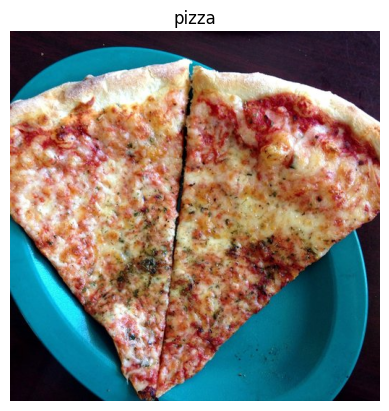

In [15]:
# View random image from the training dataset
img = view_random_image(
  target_dir="pizza_steak/train/",
  target_class="pizza"
)

In [34]:
# Get train and testing data
# Normalise pixel values between [0, 1], ie divide by 255

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to training and test data in directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and put into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [33]:
# Create CNN model

from keras import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

input = Input(shape=(224, 224, 3))

x = Conv2D(16, (5, 5), activation="relu")(input)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(32, (5, 5), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(32, (4, 4), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(16, (4, 4), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(4, (4, 4), activation="relu")(x)
x = Flatten()(x)

x = Dense(16, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input], outputs=[output])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 32)        1641

In [35]:
# Compile model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [36]:
# List GPU devices
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [37]:
# Fit model to train data
history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
47/47 [==============================] - 9s 172ms/step - loss: 0.6078 - accuracy: 0.6793 - val_loss: 0.4960 - val_accuracy: 0.8060
Epoch 2/20
47/47 [==============================] - 8s 162ms/step - loss: 0.4816 - accuracy: 0.7807 - val_loss: 0.4053 - val_accuracy: 0.8120
Epoch 3/20
47/47 [==============================] - 8s 166ms/step - loss: 0.4558 - accuracy: 0.8093 - val_loss: 0.4231 - val_accuracy: 0.8360
Epoch 4/20
47/47 [==============================] - 8s 172ms/step - loss: 0.4511 - accuracy: 0.8127 - val_loss: 0.3457 - val_accuracy: 0.8560
Epoch 5/20
47/47 [==============================] - 8s 162ms/step - loss: 0.4171 - accuracy: 0.8233 - val_loss: 0.3758 - val_accuracy: 0.8520
Epoch 6/20
47/47 [==============================] - 7s 154ms/step - loss: 0.4030 - accuracy: 0.8227 - val_loss: 0.3846 - val_accuracy: 0.8560
Epoch 7/20
47/47 [==============================] - 8s 160ms/step - loss: 0.4196 - accuracy: 0.8107 - val_loss: 0.3682 - val_accuracy: 0.8340
Epoch 

<Axes: >

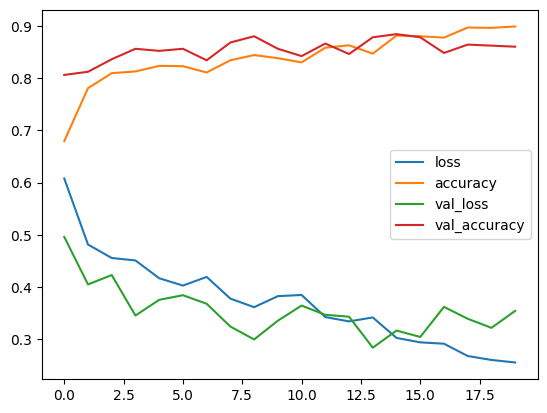

In [38]:
# Inspect training curve
import pandas as pd
pd.DataFrame(history.history).plot()

### Reducing Overfitting

Will try to reduce overfitting and decrease the validation loss more by using less conv channels and removing a dense layer.

In [55]:
# Create CNN model

import tensorflow as tf

tf.random.set_seed(42)

from keras import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

input = Input(shape=(224, 224, 3))

x = Conv2D(10, (3, 3), activation="relu")(input)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
output = Dense(1, activation="sigmoid")(x)

model_2 = Model(inputs=[input], outputs=[output])

model_2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 52, 52, 10)        910 

In [58]:
# Compile model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model_2.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [59]:
# Fit model to train data
history_2 = model_2.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 0.3773 - accuracy: 0.8380 - val_loss: 0.3104 - val_accuracy: 0.8700
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3546 - accuracy: 0.8567 - val_loss: 0.3641 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3630 - accuracy: 0.8420 - val_loss: 0.2868 - val_accuracy: 0.8900
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3607 - accuracy: 0.8433 - val_loss: 0.3171 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3210 - accuracy: 0.8700 - val_loss: 0.2834 - val_accuracy: 0.8920


<Axes: >

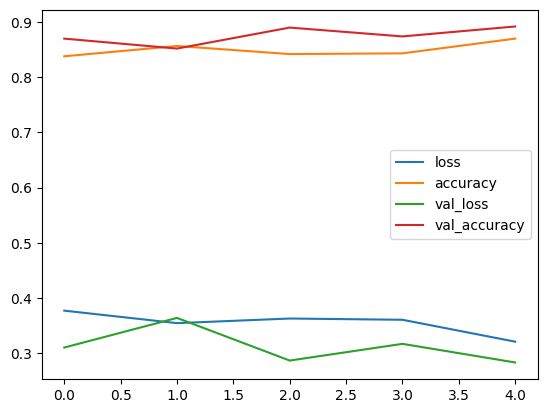

In [60]:
# Inspect training curve
import pandas as pd
pd.DataFrame(history_2.history).plot()

### Reducing overfitting via data augmentation

In [67]:
# Create image data gen with data augmentation

# Get train and testing data
# Normalise pixel values between [0, 1], ie divide by 255

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Set seed
tf.random.set_seed(42)

# Preprocess data (train data is randomly augmented)
train_datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to training and test data in directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and put into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [68]:
# Create CNN model (same as previous model)

tf.random.set_seed(42)

from keras import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

input = Input(shape=(224, 224, 3))

x = Conv2D(10, (3, 3), activation="relu")(input)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Conv2D(10, (3, 3), activation="relu")(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)
output = Dense(1, activation="sigmoid")(x)

model_3 = Model(inputs=[input], outputs=[output])

model_3.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_49 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 52, 52, 10)        910

In [69]:
# Compile model
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model_3.compile(
    optimizer=Adam(),
    loss=BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [70]:
# Train model
history_3 = model_3.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 23s 468ms/step - loss: 0.6510 - accuracy: 0.6140 - val_loss: 0.5322 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5425 - accuracy: 0.7340 - val_loss: 0.3875 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4859 - accuracy: 0.7833 - val_loss: 0.3462 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4853 - accuracy: 0.7807 - val_loss: 0.3400 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4521 - accuracy: 0.7893 - val_loss: 0.3389 - val_accuracy: 0.8620


<Axes: >

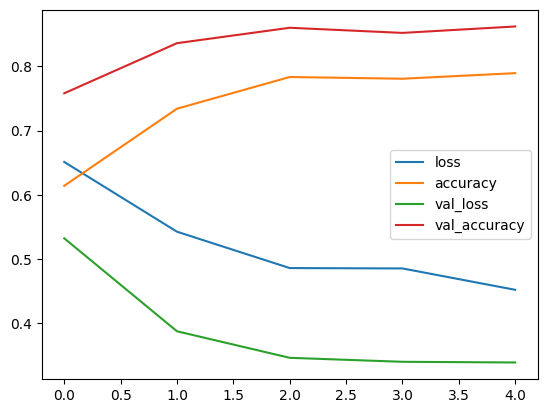

In [71]:
# Inspect training curve
import pandas as pd
pd.DataFrame(history_3.history).plot()